In [210]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [211]:
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y = np.array([[ 49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

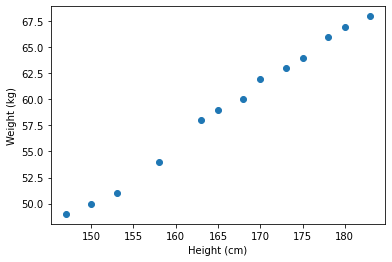

In [212]:
plt.plot(X, y, 'o')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [265]:
X_scaled = X/max(X)
Xbar_scaled = np.hstack((np.ones((X.shape[0], 1)), X_scaled))
y_scaled = y/max(y)

In [266]:
def compute_cost(theta, X, y):
    return np.sum(1/2 * ((X @ theta - y) ** 2))

In [267]:
def sgd(theta, X, y, learning_rate, iter_counts):
    J_history = []
    m = len(y)
    for i in range(iter_counts):
        X = np.random.permutation(X)
        for dt_i in range(m):
            theta = theta - learning_rate * (X[dt_i, np.newaxis].T @ ((X[dt_i, np.newaxis] @ theta) - y[dt_i, np.newaxis]))
        J_history.append(compute_cost(theta, X, y))
        print('Epoch {}/{}: Loss {} => {}'.format(i + 1, iter_counts, J_history[-2] if len(J_history) > 1 else 'None', J_history[-1]))
    return theta, J_history

In [268]:
init_theta = np.zeros((Xbar.shape[1], 1))

In [269]:
theta, J_history = sgd(init_theta, Xbar_scaled, y_scaled, 0.01, 20)
theta

Epoch 1/20: Loss None => 3.1043755335830467
Epoch 2/20: Loss 3.1043755335830467 => 1.9302034104171337
Epoch 3/20: Loss 1.9302034104171337 => 1.219124582898433
Epoch 4/20: Loss 1.219124582898433 => 0.779452890834003
Epoch 5/20: Loss 0.779452890834003 => 0.49040305094481795
Epoch 6/20: Loss 0.49040305094481795 => 0.32490442473587183
Epoch 7/20: Loss 0.32490442473587183 => 0.22202199871885897
Epoch 8/20: Loss 0.22202199871885897 => 0.15565553964133888
Epoch 9/20: Loss 0.15565553964133888 => 0.13007612327029205
Epoch 10/20: Loss 0.13007612327029205 => 0.09202431829707318
Epoch 11/20: Loss 0.09202431829707318 => 0.07928987343817301
Epoch 12/20: Loss 0.07928987343817301 => 0.0785988242494082
Epoch 13/20: Loss 0.0785988242494082 => 0.06662824800614384
Epoch 14/20: Loss 0.06662824800614384 => 0.07003379088787115
Epoch 15/20: Loss 0.07003379088787115 => 0.07080251679624808
Epoch 16/20: Loss 0.07080251679624808 => 0.05692439651444323
Epoch 17/20: Loss 0.05692439651444323 => 0.07307071097646674
E

array([[0.47871804],
       [0.43061332]])

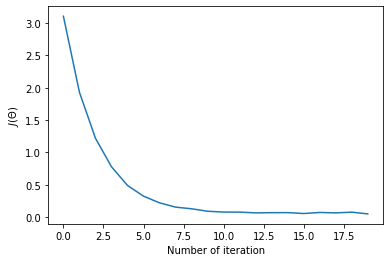

In [270]:
plt.plot(J_history)
plt.xlabel('Number of iteration')
plt.ylabel('$J(\Theta)$')
plt.show()

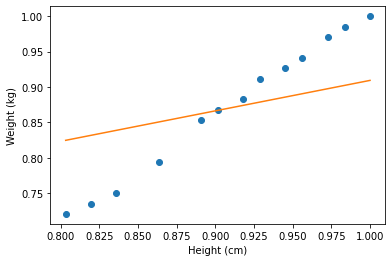

In [271]:
x0 = np.linspace(min(X_scaled), max(X_scaled), 2)
y0 = theta[0][0] + x0 * theta[1][0]
plt.plot(X_scaled, y_scaled, 'o')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.plot(x0, y0)
plt.show()